## Bhagyashri Patil - BDA 572 : Final Project

## Kaggle "all the news" classification task

In [ ]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as gs
import sklearn.feature_extraction.text as text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn.naive_bayes as nb
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import os.path
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS 

import warnings
warnings.filterwarnings(action='ignore')

data_dir = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static'

# Accessing the Articles-1 Dataset:
df1 = pd.read_csv(os.path.join(data_dir,'articles1.csv'))
Srcs = [df1.iloc[i]['publication'] for i in range(len(df1))]
print(len(Srcs))
set(Srcs)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
29759


{'Breitbart', 'New York Times', nan}

In [ ]:
# Extracting Articles-1 Dataset:
df1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


---

#### Filtering the News Sources in DF-1 limited to "New York Times", "Breitbart", "New York Post":

In [ ]:
# Filtering the dataset to three news sources which are New York Times, Breitbart, and New York Post:
filtered_news_df1 = df1[ (df1['publication'] == "New York Times") | (df1['publication'] == "Breitbart") | (df1['publication'] == "New York Post")]
filtered_news_df1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [ ]:
# Accessing the Articles-2 Dataset:

df2 = pd.read_csv(os.path.join(data_dir,'articles2.csv'))
Srcs2 = [df2.iloc[i]['publication'] for i in range(len(df2))]
print(len(Srcs2))
set(Srcs2)

49999


{'Atlantic',
 'Buzzfeed News',
 'Fox News',
 'Guardian',
 'National Review',
 'New York Post',
 'Talking Points Memo'}

In [ ]:
# Extracting Articles-2 Dataset:
df2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
2,53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
4,53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


---

#### Filtering the News Sources in DF-2 limited to "New York Times", "Breitbart", "New York Post":

In [ ]:
# Filtering the dataset to three news sources which are New York Times, Breitbart, and New York Post:
filtered_news_df2 = df2[ (df2['publication'] == "New York Times") | (df2['publication'] == "Breitbart") | (df2['publication'] == "New York Post")]
filtered_news_df2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
27633,81092,122293,Gunman dressed as Santa Claus kills dozens at ...,New York Post,Associated Press,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101013549/htt...,ISTANBUL — An assailant believed to have be...
27634,81093,122294,Disney could receive $50M for Carrie Fisher’s ...,New York Post,Lindsay Putnam,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101013549/htt...,Carrie Fisher’s death could be a windfall for ...
27635,81094,122295,Alabama torments Washington with old-school fo...,New York Post,Howie Kussoy,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101013549/htt...,ATLANTA — Washington wanted to prove the wo...
27636,81095,122296,"NBC, Charter extend talks to avert midnight bl...",New York Post,Post Staff Report,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101013549/htt...,A midnight blackout of NBC on local cable scre...
27637,81096,122297,"Phil Jackson bolts, Greg Bird explodes and mor...",New York Post,Post Staff Report,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101013549/htt...,This is the best day of the year to be a sport...


In [ ]:
# Accessing the Articles-3 Dataset:

df3 = pd.read_csv(os.path.join(data_dir,'articles3.csv'))
Srcs3 = [df3.iloc[i]['publication'] for i in range(len(df3))]
print(len(Srcs3))
set(Srcs3)

42571


{'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post'}

In [ ]:
# Extracting Articles-3 Dataset:
df3.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


---

#### Filtering the News Sources in DF-3 limited to "New York Times", "Breitbart", "New York Post":

In [ ]:
# Filtering the dataset to three news sources which are New York Times, Breitbart, and New York Post:
filtered_news_df3 = df3[ (df3['publication'] == "New York Times") | (df3['publication'] == "Breitbart") | (df3['publication'] == "New York Post")]
filtered_news_df3.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content


---

#### Merging all Filtered data frames into one consolidated dataframe:

In [ ]:
# Merging all 3 dataframes consisting of three possible news sources which are New York Times, Breitbart, and New York Post:

df = filtered_news_df1.append(filtered_news_df2.append(filtered_news_df3, ignore_index=True), ignore_index=True)
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


---

#### Displaying the data present under three news sources categories:

Distribution of labels in %

Breitbart         46.464625
New York Post     37.021439
New York Times    16.513936
Name: publication, dtype: float64


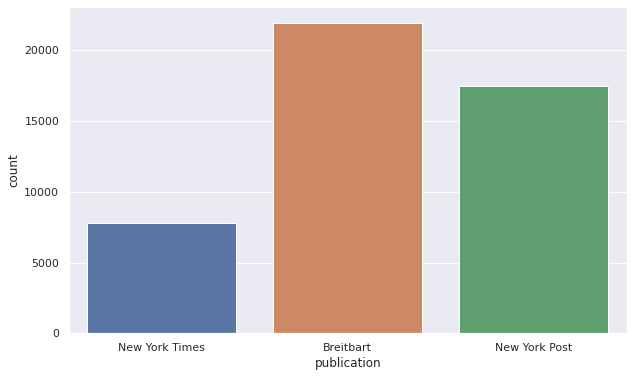

In [ ]:
print('Distribution of labels in %\n')
print(df['publication'].value_counts()/df.shape[0]*100)

sns.set(font_scale=1.0)
plt.figure(figsize=(10,6))
sns.countplot(df['publication']);

---

### Data Pre-processing:

- 1) Lower-casing the headlines
- 2) Removing punctuations
- 3) Removing Stopwords

#### Lower-casing and Tokenizing the Headlines Titles:

In [ ]:
# Function for Tokenizing the News Headline Text:

def tokenize_text(text):
    # Lower case all words in all the news headline titles
    text = text.lower()

    # Remove punctuations
    text = re.sub('\s\W',' ', text)
    text = re.sub('\W\s',' ', text)

    # Remove double-spaced characters
    text = re.sub('\s+',' ', text)    

    return text

In [ ]:
df_title = [df.iloc[i]['title'] for i in range(len(df))]
tokenized_titles = [tokenize_text(i) for i in df_title]
tokenized_titles[:5]

['house republicans fret about winning their health care suit the new york times',
 'rift between officers and residents as killings persist in south bronx the new york times',
 'tyrus wong bambi artist thwarted by racial bias dies at 106 the new york times',
 'among deaths in 2016 a heavy toll in pop music the new york times',
 'kim jong-un says north korea is preparing to test long-range missile the new york times']

In [ ]:
len(tokenized_titles)

47251

#### Adding new column of Tokenized Titles, and Publication ID to the Dataframe:

In [ ]:
# Addine new column of publication ID to the dataframe:
d = {'New York Times':1, 'Breitbart':2, 'New York Post':3}
df['publication_ID'] = df['publication'].map(d)
df['tokenize_title'] = tokenized_titles

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["stopwords_removed"] = df["tokenize_title"].apply(lambda text: remove_stopwords(text))

In [ ]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,publication_ID,tokenize_title,stopwords_removed
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,1,house republicans fret about winning their hea...,house republicans fret winning health care sui...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",1,rift between officers and residents as killing...,rift officers residents killings persist south...
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",1,tyrus wong bambi artist thwarted by racial bia...,tyrus wong bambi artist thwarted racial bias d...
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",1,among deaths in 2016 a heavy toll in pop music...,among deaths 2016 heavy toll pop music new yor...
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",1,kim jong-un says north korea is preparing to t...,kim jong-un says north korea preparing test lo...


#### Finding all the stopwords removed from the News Headlines:

In [ ]:
stop_words = set(STOPWORDS)
print(stop_words)
print(len(stop_words))

{'hadn', 'them', 'same', 'under', 'or', 'his', "don't", 'weren', "mustn't", "hadn't", 'against', 'shan', 'herself', 'this', 'as', 'him', 'about', 'mustn', 'just', "it's", 'shouldn', 'with', 't', 'ours', 'they', 'wouldn', 'yours', 'i', "didn't", "wasn't", "aren't", 'between', 'he', 'am', 'does', 'an', 'until', 'again', 'very', 'she', 'your', 'there', "weren't", "should've", 'those', 'should', 'nor', 'from', "you'll", 'more', 'because', 'you', "that'll", "shan't", 'do', "isn't", 'o', 'did', 'have', 'other', 'once', 'own', 'aren', 'that', 'our', 'here', 'were', 'itself', 've', 'has', 'her', 'ma', 'whom', 'y', 'where', 'of', 'than', 'into', 'theirs', 's', 'had', 'few', 'out', "she's", 'and', 'hers', 'the', 'below', 'further', 'will', "doesn't", 'why', 'll', "wouldn't", 'their', 'be', 'myself', 'is', 'how', 'd', 'm', 'by', 'on', 'wasn', 'off', 'which', 'who', 'needn', 'ourselves', 'some', "hasn't", 'won', 'at', 'so', "haven't", 'doesn', 'no', 'any', 'having', 'now', 'couldn', 'being', 'me',

---

### **Designing a Classifier:**

### Scikit Learn Model:

In [ ]:
# For Categorical Data:
le = LabelEncoder()
df['publication_ID'] = le.fit_transform(df['publication_ID'])

df.head(5)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,publication_ID,tokenize_title,stopwords_removed
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,0,house republicans fret about winning their hea...,house republicans fret winning health care sui...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0,rift between officers and residents as killing...,rift officers residents killings persist south...
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",0,tyrus wong bambi artist thwarted by racial bia...,tyrus wong bambi artist thwarted racial bias d...
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",0,among deaths in 2016 a heavy toll in pop music...,among deaths 2016 heavy toll pop music new yor...
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0,kim jong-un says north korea is preparing to t...,kim jong-un says north korea preparing test lo...


---

#### **CountVectorizer Results:**

In [ ]:
# Passing the data into the vectors:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['stopwords_removed'])
y = df['publication_ID']

# Split the data into Train and Test datasets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=df.publication_ID)

# Shape of all the test and train datasets:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37800, 27674)
(37800,)
(9451, 27674)
(9451,)


In [ ]:
results = pd.DataFrame(columns=['Model','Accuracy','F1-score'])

model_name = ["Logistic Regression", "Decision Tree", "Multinomial Naive Bayes"]
model_list = [LogisticRegression(), DecisionTreeClassifier(), MultinomialNB()]

for idx,model in enumerate(model_list):
    clf = model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    results.loc[idx] = [model_name[idx],
                        accuracy_score(y_test,predictions),
                        f1_score(y_test,predictions,average = 'weighted')]

print("Count Vectorizer Results:")
results.sort_values(by='Accuracy', inplace=True, ascending=False)
results

Count Vectorizer Results:


,Model,Accuracy,F1-score
0,Logistic Regression,0.925511,0.925699
1,Decision Tree,0.902021,0.902080
2,Multinomial Naive Bayes,0.889218,0.887503


---

#### **TF - IDF Results:**

In [ ]:
# TF-IDF:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['stopwords_removed'].values)
y = df['publication_ID']

# Split the data into Train and Test datasets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=df.publication_ID)

# Shape of all the test and train datasets:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37800, 27674)
(37800,)
(9451, 27674)
(9451,)


In [ ]:
results = pd.DataFrame(columns=['Model','Accuracy','F1-score'])

model_name = ["Logistic Regression", "Decision Tree", "Multinomial Naive Bayes"]
model_list = [LogisticRegression(), DecisionTreeClassifier(), MultinomialNB()]

for idx,model in enumerate(model_list):
    clf = model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    results.loc[idx] = [model_name[idx],
                        accuracy_score(y_test,predictions),
                        f1_score(y_test,predictions,average = 'weighted')]

print("TF - IDF Results:")
results.sort_values(by='Accuracy', inplace=True, ascending=False)
results

TF - IDF Results:


,Model,Accuracy,F1-score
0,Logistic Regression,0.916517,0.916613
1,Decision Tree,0.902762,0.902774
2,Multinomial Naive Bayes,0.807851,0.803908


---

#### Checking for all the words having the largest co-efficient:

In [ ]:
dir(model_list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

---

#### Validating the estimation of the model:

`{'New York Times':1, 'Breitbart':2, 'New York Post':3}`

In [ ]:
predictions = model.predict(tfidf.transform([
    "New District Maps in New York Hurt Democrats’ Hopes in House Races.",
    "Cold Soldiers Captive Russian troops claim commanders kill their own wounded troops.",
    "This is Biden’s ‘crime crisis across America."]))

print(predictions)

[2 1 1]


---